# Lecture 3: An Introductory Example
In this lecture, we will write small Python programs and then pick them apart to get used to basic Python syntax and data structures. We will cover some of these things (and many others) more extensively in later lectures.

### Creating and Plotting a White Noise Process
Suppose we want to simulate and plot a white noise process $\epsilon_0, \epsilon_1, ..., \epsilon_T$, where each draw $\epsilon_t$ is independent standard normal. In other words, we draw $T$ times randomly from a standard normally distributed random variable. We will now do this in different ways with the main purpose of learning something about Python and not so much about white noise processes per se.

### Version 1

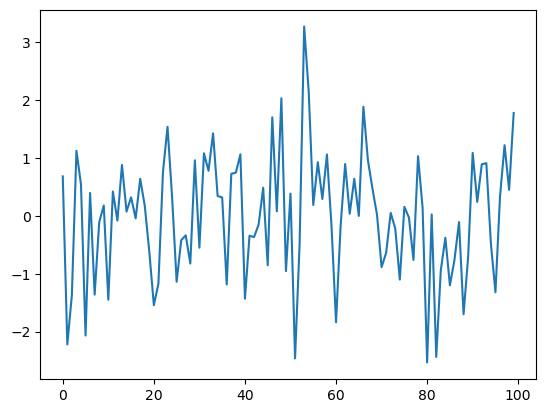

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ϵ_values = np.random.randn(100) 
plt.plot(ϵ_values)
plt.show()

That looks like a white noise process. So, let's try to understand how we did it.

The first two lines import functionality from external code libraries, as we already discussed in the first lecture.

(One thing to note: we could also just type ```import numpy``` and then we would have to write ```numpy.random.randn(100)``` instead of ```np.random.randn(100)```. So, the added ```as np```is simply for convenience that we do not have to write out ```numpy```every time we are using its functions.

#### Why so many imports?
Python programs typically require several import statements. The reason is that the core language is deliberately kept small, so that it is easy to learn and maintain. So, when you want to do something interesting with Python, you almost always need to import additional functionality.

#### Python packages
NumPy is a Python _package_. 

A package is basically just a directory containing
 - files with Python code (called __modules__ in Python speak)
 - possibly some compiled code that can be accessed by Python (for example, functions compiled from C or FORTAN code)
 - a file called ```__init__.py``` that specifies what will be executed when we type ```import package_name```.

#### Subpackages
We have already learned about packages, but there are also _subpackages_. 
For example, in the line ```ϵ_values = np.random.randn(100)``` above, ```np``` refers to the package NumPy, while ```random``` is a __subpackage__ of NumPy. We could also just import the subpackage if we only need that one particular subpackage.

#### Importing Names Directly
We can take the square root of a number by using NumPy's function ```sqrt```

In [2]:
import numpy as np

np.sqrt(4)

2.0

In [3]:
# Note, that I do not need to import numpy every time I am using it. I have already imported it in this notebook
# above, so I can simply write (this requires that I also executed the code cell where we import numpy)
np.sqrt(4) 

2.0

Another way to access NumPy's square root function is as follows:

In [4]:
from numpy import sqrt

sqrt(4)

2.0

This is also fine and the advantage is less typing if we use ```sqrt``` often. The disadvantage is that, in a long program, these two code lines might be separated by many other lines, which makes it harder to understand where ```sqrt``` is coming from.

### Random Draws
Now, going back to our program that simulates and plots the white noise process, we had the three lines
```python
ϵ_values = np.random.randn(100)
plt.plot(ϵ_values)
plt.show()
```

The first line generates 100 independent standard normals and stores them in ```ϵ_values```. 

(To get $\epsilon$ being displayed the way it is, we type \epsilon and then hit `Tab`. You can even hit `Tab` before writing out the full name to see the options available.)

The two last lines generate the plot. 

### Exercise (do this in class):
Instead of drawing from a standard normal, i.e., from a normal distribution with mean 0 and standard deviation 1, we can also draw from other distributions.

__Exercise__: Use the short code from above to draw from a normal distribution but now with mean 1 and standard deviation 0.5 and plot the resulting time series. 

(Hint: execute the command `np.random.randn?`)

In [6]:
np.random.randn?

Docstring:
randn(d0, d1, ..., dn)

Return a sample (or samples) from the "standard normal" distribution.

.. note::
    This is a convenience function for users porting code from Matlab,
    and wraps `standard_normal`. That function takes a
    tuple to specify the size of the output, which is consistent with
    other NumPy functions like `numpy.zeros` and `numpy.ones`.

.. note::
    New code should use the
    `~numpy.random.Generator.standard_normal`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

If positive int_like arguments are provided, `randn` generates an array
of shape ``(d0, d1, ..., dn)``, filled
with random floats sampled from a univariate "normal" (Gaussian)
distribution of mean 0 and variance 1. A single float randomly sampled
from the distribution is returned if no argument is provided.

Parameters
----------
d0, d1, ..., dn : int, optional
    The dimensions of the returned array, must be non-negative.
    I

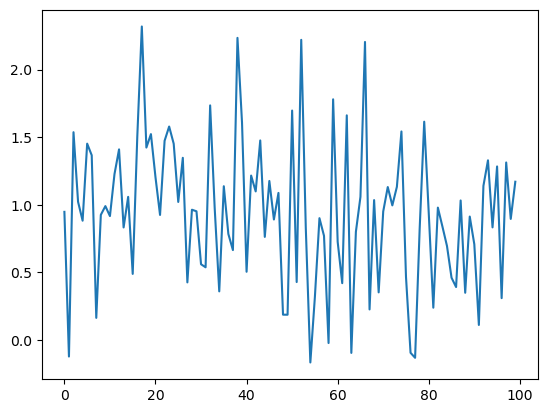

In [12]:
ϵ_value1 = 1 + 0.5* np.random.randn(100)
plt.plot(ϵ_value1)
plt.show()

## Alternative Implementations
We will now explore other ways how we can simulate and plot a white noise process. These alternative implementations are less efficient than the original one, but the purpose is to introduce you to the basic Python syntax. In other circumstances, the following tools may become very helpful when a simple solution as the one above is not available.

### Version 2: Using a For Loop
Here is a version that illustrates ```for``` loops and Python lists.

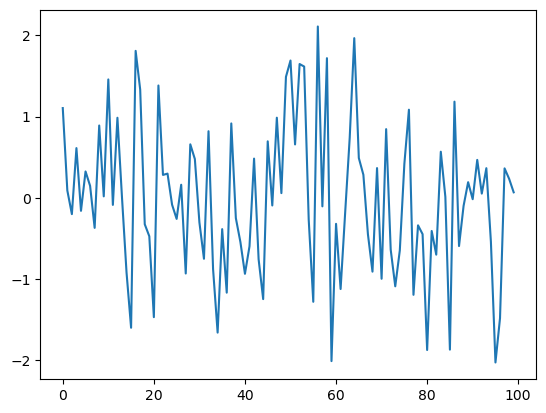

In [14]:
ts_length = 100
ϵ_values = [] # creates an empty list

for i in range(ts_length):
    e = np.random.randn()
    ϵ_values.append(e)
    
plt.plot(ϵ_values)
plt.show()

Here is what we just did:
 - the first line sets the desired length of the time series
 - the next line creates an empty _list_ called ```ϵ_values``` that will store the $\epsilon_t$ values as we generate them
 - the statement ```# creates an empty list``` is a _comment_, and is ignored by Python's interpreter. Its main purpose is to help the reader of the code to understand what the code is doing (even when you are the sole reader of your code, you will be thankful for comments when you go back to your code weeks or months after writing it)
 - the next three lines are the ```for``` loop, which repeatedly draws a new random number $e_t$ and appends it to the end of the list ```ϵ_values```
 - the last two lines generate the plot and display it to the user.

We are now going to dig a bit deeper in some parts of the program.

### Lists
We created an empty _list_ by typing the command ```ϵ_values = []```. 

Lists are a _native Python data structure_ used to group a collection of objects.

Items in lists are ordered, and duplicates are allowed in lists.

In [6]:
x = [10, 'UT', False]
type(x)

list

The first element of ```x``` is an integer, the next is a string, and the third is a Boolean value.

When adding a value to a list, we can use the syntax ```list_name.append(some_value)```:

In [7]:
x

[10, 'UT', False]

In [8]:
x.append(2.5)
x

[10, 'UT', False, 2.5]

Here ```append()``` is what is called a _method_, which is a function "attached to" an object - in this case, the list ```x```.

We will learn more about methods later on, but just to give you some idea
 - Python objects such as lists, strings, etc., all have methods that are used to manipulate the data contained in the object
 - string objects have string methods, list objects have list methods, etc.

Another useful method is ```pop()```

In [9]:
x

[10, 'UT', False, 2.5]

In [10]:
x.pop()

2.5

In [11]:
x

[10, 'UT', False]

Note, that lists in Python are zero-based (as, e.g., in C or Java), so the first element ist referenced by ```x[0]```.

In [12]:
x[0]

10

In [13]:
x.pop(0)

10

In [14]:
x

['UT', False]

### The For Loop
We now look more closely at the ```for```loop itself used in the program above, which was
```python
    for i in range(ts_length):
        e = np.random.randn()
        ϵ_values.append(e)
```

Python executes the two intended lines ```ts_length``` times before moving on.

These two intended lines are called a ```code block```, since they comprise the "block" of code that we are looping over.

Unlike most other languages, Python knows the extent of the code block _only from indentation_.

In our program, indentation decreases after the line ```ϵ_values.append(e)```, telling Python that this line marks the lower limit of the code block.

More on indentation below - for now, let's look at another example of a ```for``` loop.

In [15]:
animals = ['dog', 'cat', 'bird']
for animal in animals:
    print("The plural of " + animal + " is " + animal + "s.")

The plural of dog is dogs.
The plural of cat is cats.
The plural of bird is birds.


This example should help to clarify how the ```for``` loop works: when we execute a loop of the form
```python
for variable_name in sequence:
    <code block>
```
the Python interpreter performs the following:
 - for each element of the ```sequence```, it binds the name ```variable_name```to that element and then executes the code block.
 
The ```sequence```object can in fact be a very general object. 

In this example, the spaces before and after the words in the code block are important (try, changing them and see what happens).

Note, that in the code above we set `variable_name` to `animal` and the `sequence` is our list `animals`. This makes sense for an English speaker, but for Python it does not matter. We can give the elements whatever name we want, as the next simple code example illustrates.

In [16]:
animals = ['dog', 'cat', 'bird']
for x in animals:
    print("The plural of " + x + " is " + x + "s.")

The plural of dog is dogs.
The plural of cat is cats.
The plural of bird is birds.


### More on Indentation
We already talked briefly about indentation when we discussed how Python knows where the code block starts and where it ends. In fact, in Python, __all__ code blocks are delimited by indentation.

Thus, unlike most other languages, whitespace in Python code affects the output of the program.

It takes some time getting used to it, but it actually has a lot of advantages, including 
 - it forces clean, consistent indentation, improving readability
 - it removes clutter, such as brackets or end statements that are used in other languages
 
Always remember:
 - the line before the start of a code block always ends in a colon
     - ```for i in range(10):```
     - ```if x > y:```
     - ```while x < 100:```
 - all lines in a code block __must have the same amount of indentation__
 - the Python standard is 4 spaces, and that's what you should use

#### Another application
We now want to plot the balance of a bank account over time.

Assume that there are no withdrawals over the considered time period, the last date of which is denoted by $T$.

The initial balance is $b_0$ and the interest rate is $r$.

The balance updates from period $t$ to $t+1$ according to $b_{t+1} = (1+r)b_t$.

In the code below, we generate and plot the sequence $b_0, b_1, ..., b_T$.

Instead of using a Python list to store this sequence, we will use a NumPy array.

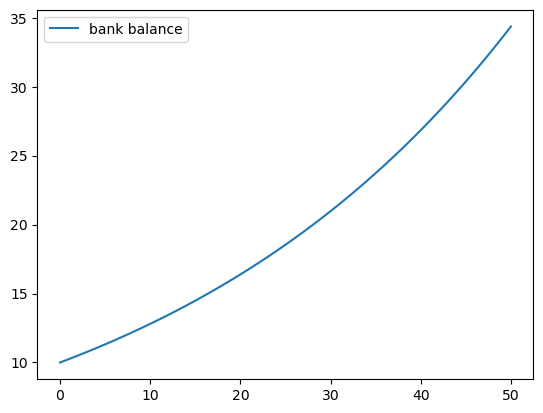

In [17]:
r = 0.025 # interest rate
T = 50 # end date
b = np.empty(T+1)
b[0] = 10 # initial balance

for t in range(T):
    b[t+1] = (1+r)*b[t]
    
plt.plot(b, label = 'bank balance')
plt.legend()
plt.show()

The statement ```b = np.empty(T+1)``` allocates storage in memory for ```T+1``` numbers. 

These numbers are then filled in by the ```for``` loop.

Allocating memory at the start is more efficient than using a Python list and ```append```, since the latter must repeatedly ask for storage space from the operating system.

Notice that we added a legend to the plot.

Could add shocks through rand.random draws in each period in loop

### While Loops
The ```for``` loop is the most common technique for iteration in Python. 

Another popular one is the ```while```loop, but it is usually a bit less intuitive than a `for` loop. Let's write our above program using a ```while``` loop:

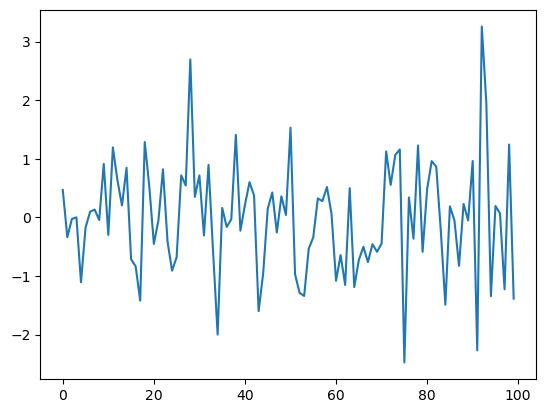

In [18]:
ts_length = 100
ϵ_values = []
i = 0
while i < ts_length:
    e = np.random.randn()
    ϵ_values.append(e)
    i = i + 1
    
plt.plot(ϵ_values)
plt.show()

A while loop will keep executing the code block delimited by indentation as long as the condition ```i < ts_length``` is satisfied.

In this case, the program will keep adding values to the list ```ϵ_values``` until ```i``` equals ```ts_length```:

In [19]:
i == ts_length

True

Note that
 - the code block for the ```while``` loop is again delimited only by indentation
 - the statement ```i = i + 1``` can be replaced by ```i += 1```.

## Exercise (do this in class):
Your first task is to simulate and plot the correlated time series

$$ x_{t+1} = \alpha x_t + \epsilon_{t+1}, \text{ where } x_0 = 0 \text{ and } t = 0,1,...T$$

The sequence of shocks $\{\epsilon_t\}$ is assumed to be IID and standard normal.

In your solution, restrict your import statements to

```python
import numpy as np
import matplotlib.pyplot as plt
```
Set $T = 200$ and $\alpha = 0.8$.


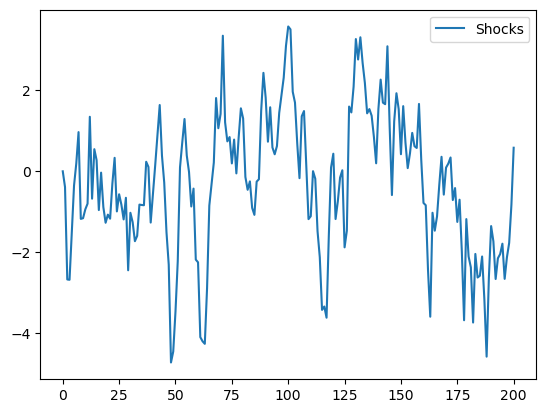

In [34]:
import numpy as np
import matplotlib.pyplot as plt 
T = 200
α = 0.8
x= np.empty(T+1)
x[0]=0
for t in range (T):
    x[t+1]= α*x[t] + np.random.randn()

plt.plot(x, label ='Shocks')
plt.legend()
plt.show()